## Toluca (Links to an external site.) dataset (courtesy of Paul Intrevado)
https://drive.google.com/file/d/1nsKeli0EU_PluE0D7yOL0BnqEajhg3hv/view?usp=sharing

In [1]:
import pandas as pd
df = pd.read_csv('toluca.csv')
df.head()

,lotSize,workHours
0,80,399
1,30,121
2,50,221
3,90,376
4,70,361


### Note: as described in the instructions,  lotSize (col 0) is the target

### predictor against the target

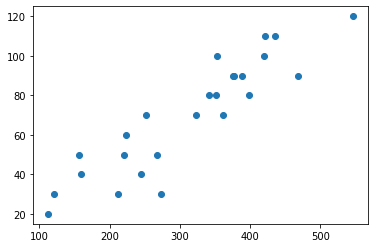

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df.iloc[:,1], df.iloc[:,0], alpha=1)

### residual plot
- It is seen from the structure of residuals that the residual is randomly distributed.

[Text(0, 0.5, 'Residual'), Text(0.5, 0, 'WorkHours')]

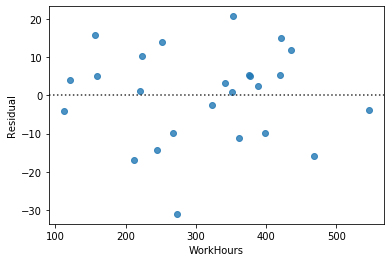

In [11]:
import seaborn as sns

rl = sns.residplot('workHours', 'lotSize', data=df)
rl.set(xlabel='WorkHours', ylabel='Residual')

### coefficients (slope, intercept) against the target

In [13]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(df.drop('lotSize', axis=1), df.iloc[:,0])

print(reg.coef_)
print(reg.intercept_)

[0.2301084]
-1.858251142306358


### square root of mean squared error

In [16]:
import numpy as np
from sklearn.metrics import mean_squared_error
hypotheses = reg.predict(df.drop('lotSize', axis=1))
mse = mean_squared_error(df.iloc[:,0], hypotheses)
print('RMSE:', np.sqrt(mse))

RMSE: 11.88888086607703


## Conclusion
- The range of lotSize is from 30 to 120,while the squrare root of mean_squared_error between hypotheses and target is about 11.  
- Meanwhile, the redidual is randomly distributed.
### So this dataset is suitable for SLR

## Credit (Links to an external site.) dataset 
http://faculty.marshall.usc.edu/gareth-james/ISL/Credit.csv

In [14]:
import pandas as pd
df = pd.read_csv('Credit.csv')
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [15]:
df = df[['Income', 'Rating', 'Cards', 'Age', 'Education', 'Limit']]
labels = df['Limit']
df.head()

,Income,Rating,Cards,Age,Education,Limit
0,14.891,283,2,34,11,3606
1,106.025,483,3,82,15,6645
2,104.593,514,4,71,11,7075
3,148.924,681,3,36,11,9504
4,55.882,357,2,68,16,4897


## predictors against the target

### predictor1: Income

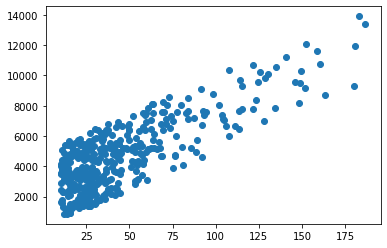

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df['Income'], labels, alpha=1)

### residual plot
- from the plot we see that the residuals is randomly distributed.

[Text(0, 0.5, 'Limit'), Text(0.5, 0, 'Income')]

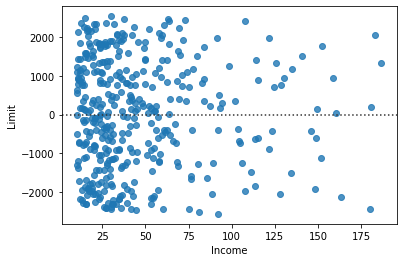

In [21]:
import seaborn as sns

rl = sns.residplot('Income', 'Limit', data=df[['Income', 'Limit']])
rl.set(xlabel='Income', ylabel='Limit')

### coefficients (slope, intercept) against the target for predicter "Income"

In [22]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(df[['Income']], df['Limit'])

print(reg.coef_)
print(reg.intercept_)

[51.8750206]
2389.8694089155265


### square root of mean squared error for "Limit vs Income"

In [24]:
import numpy as np
from sklearn.metrics import mean_squared_error
hypotheses = reg.predict(df[['Income']])
mse = mean_squared_error(df['Limit'], hypotheses)
print('RMSE for Limit vs Income:', np.sqrt(mse))

RMSE for Limit vs Income: 1407.177235786527


## Conclusion for "Limit vs Income"
- The range of Limit is from about 1000 to 12000,while the squrare root of mean_squared_error between hypotheses and target is about 1400.  
- Meanwhile, the redidual is randomly distributed.
### So this dataset is suitable for SLR

### predictor2: Rating¶

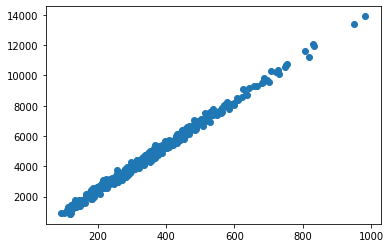

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df['Rating'], labels, alpha=1)

### residual plot¶
- from the plot we see that the residuals is randomly distributed.

[Text(0, 0.5, 'Limit'), Text(0.5, 0, 'Rating')]

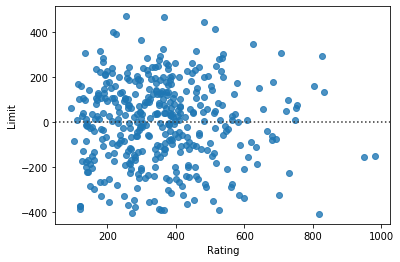

In [26]:
import seaborn as sns

rl = sns.residplot('Rating', 'Limit', data=df[['Rating', 'Limit']])
rl.set(xlabel='Rating', ylabel='Limit')

### coefficients (slope, intercept) against the target for predicter "Rating"¶

In [27]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(df[['Rating']], df['Limit'])

print(reg.coef_)
print(reg.intercept_)

[14.87160712]
-542.928229986901


### square root of mean squared error for "Limit vs Income"

In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error
hypotheses = reg.predict(df[['Rating']])
mse = mean_squared_error(df['Limit'], hypotheses)
print('RMSE for Limit vs Rating:', np.sqrt(mse))

RMSE for Limit vs Rating: 181.97060022313866


## Conclusion for "Limit vs Rating"
- The relationship between limit and income is a perfect line.
- The range of Limit is from about 1000 to 12000,while the squrare root of mean_squared_error between hypotheses and target is about 181.  
- Meanwhile, the redidual is randomly distributed.
### So this dataset is suitable for SLR

### predictor3: Cards¶

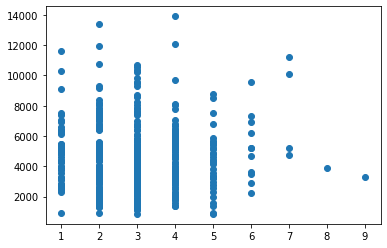

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df['Cards'], labels, alpha=1)

### residual plot
- from the plot we see that the residuals is NOT distributed in a linear fashion.

[Text(0, 0.5, 'Limit'), Text(0.5, 0, 'Cards')]

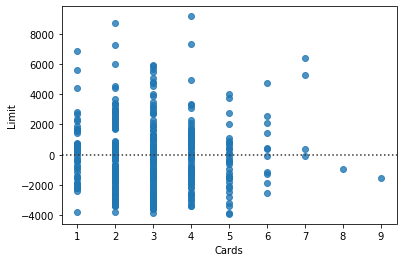

In [32]:
import seaborn as sns

rl = sns.residplot('Cards', 'Limit', data=df[['Cards', 'Limit']])
rl.set(xlabel='Cards', ylabel='Limit')

### coefficients (slope, intercept) against the target for predicter "Cards"

In [34]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(df[['Cards']], df['Limit'])

print(reg.coef_)
print(reg.intercept_)

[17.22189457]
4684.666246822009


### square root of mean squared error for "Limit vs Cards"

In [36]:
import numpy as np
from sklearn.metrics import mean_squared_error
hypotheses = reg.predict(df[['Cards']])
mse = mean_squared_error(df['Limit'], hypotheses)
print('RMSE for Limit vs Cards:', np.sqrt(mse))

RMSE for Limit vs Cards: 2305.191130067059


## Conclusion for "Limit vs Cards"
- The scatter plot of Limit vs cards has shown that the relationship between them is not a linear one.
- Meanwhile, the range of Limit is from about 1000 to 12000,while the squrare root of mean_squared_error between hypotheses and target is about 2300, which is quite large 
### So this dataset is NOT suitable for SLR

### predictor4: Age

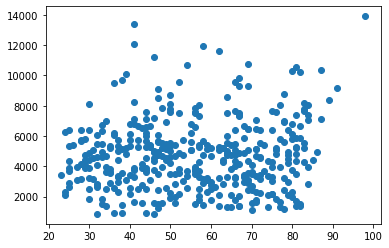

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df['Age'], labels, alpha=1)

### residual plot
- from the plot below we see that the residuals is almost randomly distributed.

[Text(0, 0.5, 'Limit'), Text(0.5, 0, 'Age')]

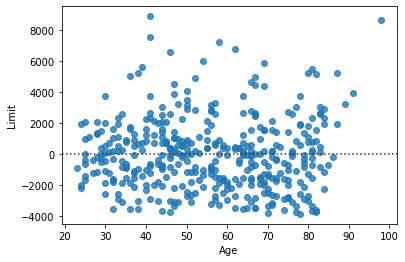

In [40]:
import seaborn as sns

rl = sns.residplot('Age', 'Limit', data=df[['Age', 'Limit']])
rl.set(xlabel='Age', ylabel='Limit')

### coefficients (slope, intercept) against the target for predicter "Age"

In [41]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(df[['Age']], df['Limit'])

print(reg.coef_)
print(reg.intercept_)

[13.49982568]
3984.0984540274258


### square root of mean squared error for "Limit vs Age"

In [42]:
import numpy as np
from sklearn.metrics import mean_squared_error
hypotheses = reg.predict(df[['Age']])
mse = mean_squared_error(df['Limit'], hypotheses)
print('RMSE for Limit vs Age:', np.sqrt(mse))

RMSE for Limit vs Age: 2293.5496256325955


## Conclusion for "Limit vs Age"
- The scatter plot of Limit vs cards has shown that the relationship between them is not a linear one.
- Meanwhile, the range of Limit is from about 1000 to 12000,while the squrare root of mean_squared_error between hypotheses and target is about 2300, which is quite large 
### So this dataset is NOT suitable for SLR

### predictor5: Education

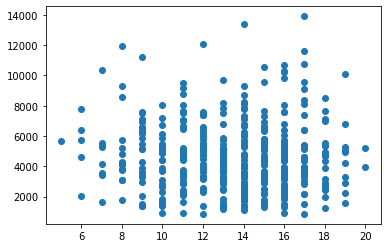

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df['Education'], labels, alpha=1)

### residual plot
- from the plot we see that the residuals is randomly distributed.

[Text(0, 0.5, 'Limit'), Text(0.5, 0, 'Education')]

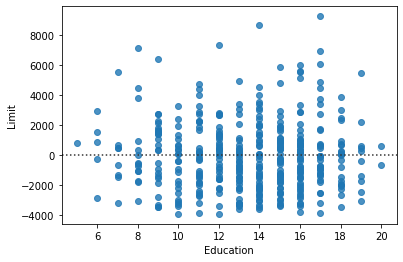

In [45]:
import seaborn as sns

rl = sns.residplot('Education', 'Limit', data=df[['Education', 'Limit']])
rl.set(xlabel='Education', ylabel='Limit')

### coefficients (slope, intercept) against the target for predicter "Education"

In [47]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(df[['Education']], df['Limit'])

print(reg.coef_)
print(reg.intercept_)

[-17.39235309]
4969.527149089043


### square root of mean squared error for "Limit vs Education"

In [50]:
import numpy as np
from sklearn.metrics import mean_squared_error
hypotheses = reg.predict(df[['Education']])
mse = mean_squared_error(df['Limit'], hypotheses)
print('RMSE for Limit vs Income:', np.sqrt(mse))

RMSE for Limit vs Income: 2304.6725185436444


## Conclusion for "Limit vs Education"
- The scatter plot of Limit vs cards has shown that the relationship between them is not a linear one.
- Meanwhile, the range of Limit is from about 1000 to 12000,while the squrare root of mean_squared_error between hypotheses and target is about 2300, which is quite large 
### So this dataset is NOT suitable for SLR

## In the second dataset, with Limit as Target, "Income", "Rating" are suitable for SLR, while "Cards", "Age", "Education" are not.